# Membuat Multi Line Chart

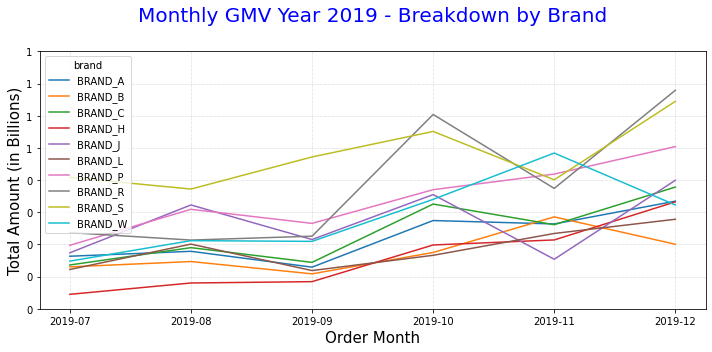

In [1]:
# Import Library
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset
dataset = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv")

# Buat kolom baru yang bertipe datetime dalam format "%Y-%m"
dataset["order_month"] = dataset["order_date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))

# Buat Kolom GMV
dataset["gmv"] = dataset["item_price"] * dataset["quantity"]

# Buat Multi-Line Chart
dataset.groupby(["order_month","brand"])["gmv"].sum().unstack().plot()
plt.title("Monthly GMV Year 2019 - Breakdown by Brand", loc="center", pad=30, fontsize=20, color="blue")
plt.xlabel("Order Month", fontsize=15)
plt.ylabel("Total Amount (in Billions)", fontsize=15)
plt.grid(color="darkgray", linestyle=":", linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

# Kostomisasi Legend

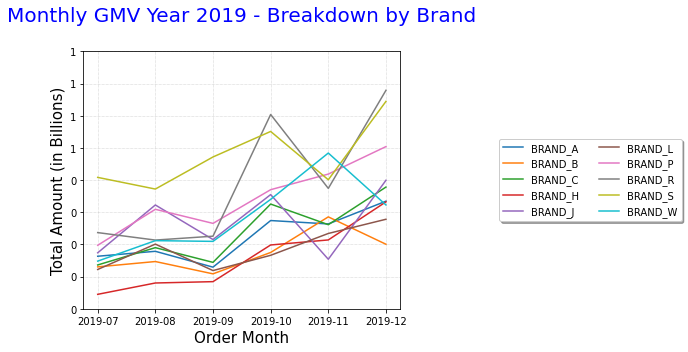

In [2]:
import matplotlib.pyplot as plt
dataset.groupby(["order_month","brand"])["gmv"].sum().unstack().plot()
plt.title("Monthly GMV Year 2019 - Breakdown by Brand", loc="center", pad=30, fontsize=20, color="blue")
plt.xlabel("Order Month", fontsize=15)
plt.ylabel("Total Amount (in Billions)", fontsize=15)
plt.grid(color="darkgray", linestyle=":", linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc="center", bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

# Kustomisasi Colormap

<Figure size 432x288 with 0 Axes>

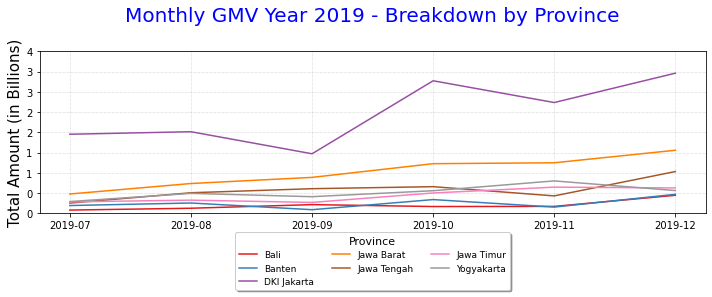

In [3]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv")
dataset["order_month"] = dataset["order_date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))
dataset["gmv"] = dataset["item_price"] * dataset["quantity"]

plt.clf()
dataset.groupby(["order_month","province"])["gmv"].sum().unstack().plot(cmap="Set1")
plt.title("Monthly GMV Year 2019 - Breakdown by Province", loc="center", pad=30, fontsize=20, color="blue")
plt.xlabel("Order Month", fontsize=15)
plt.ylabel("Total Amount (in Billions)", fontsize=15)
plt.grid(color="darkgray", linestyle=":", linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), shadow="True", ncol=3, title="Province", fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

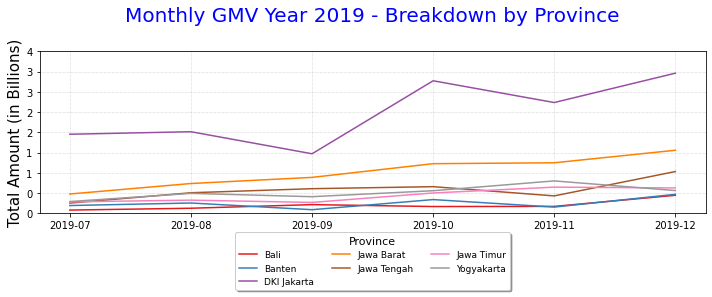

In [4]:
import matplotlib.pyplot as plt
plt.clf()
dataset.groupby(["order_month","province"])["gmv"].sum().unstack().plot(cmap="Set1")
plt.title("Monthly GMV Year 2019 - Breakdown by Province", loc="center", pad=30, fontsize=20, color="blue")
plt.xlabel("Order Month", fontsize = 15)
plt.ylabel("Total Amount (in Billions)",fontsize = 15)
plt.grid(color="darkgray", linestyle=":", linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), shadow="True", ncol=3, title="Province", fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

# Membuat Line Chart GMV Breakdown by Top Provinces

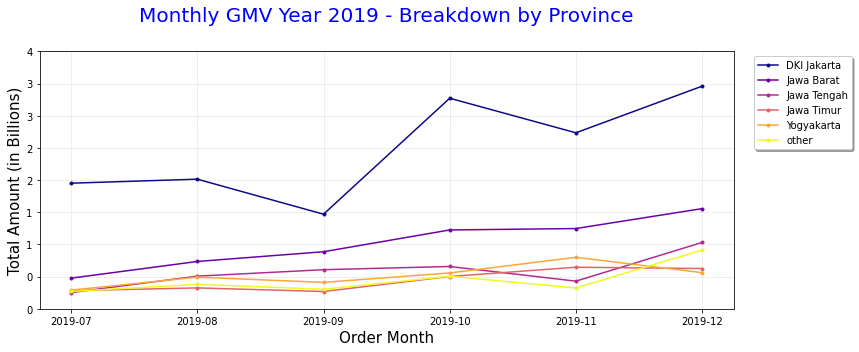

In [5]:
# Buat variable untuk 5 provinsi dengan GMV tertinggi
top_provinces = dataset.groupby("province")["gmv"].sum().reset_index().sort_values(by="gmv", ascending=False).head(5)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset["province_top"] = dataset["province"].apply(lambda x: x if (x in top_provinces["province"].to_list()) else "other")

# Plot Multi-Line chartnya
import matplotlib.pyplot as plt
dataset.groupby(["order_month","province_top"])["gmv"].sum().unstack().plot(marker=".", cmap="plasma")
plt.title("Monthly GMV Year 2019 - Breakdown by Province", loc="center", pad=30, fontsize=20, color="blue")
plt.xlabel("Order Month", fontsize=15)
plt.ylabel("Total Amount (in Billions)", fontsize=15)
plt.grid(color="darkgray", linestyle=":", linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc="upper center", bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


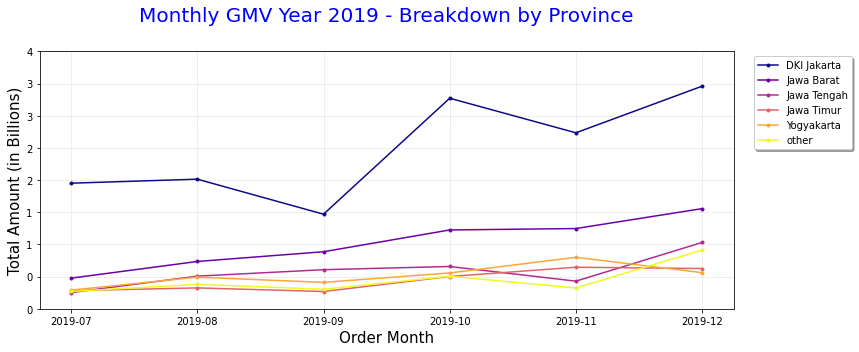

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv,province_top
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta
5,1672906,2019-07-16,12748,Jakarta Utara,DKI Jakarta,P0710,BRAND_C,4,520000,2019-07,2080000,DKI Jakarta
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000,DKI Jakarta
7,1695367,2019-09-26,13069,Surakarta,Jawa Tengah,P3342,BRAND_S,2,205000,2019-09,410000,Jawa Tengah
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000,2019-12,14400000,DKI Jakarta
9,1720189,2019-11-24,14723,Tangerang,Banten,P1701,BRAND_H,2,149000,2019-11,298000,other


In [6]:
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = dataset.groupby("province")["gmv"].sum().reset_index().sort_values(by="gmv", ascending=False).head(5)
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset["province_top"] = dataset["province"].apply(lambda x: x if x in top_provinces["province"].to_list() else "other")

# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(["order_month","province_top"])["gmv"].sum().unstack().plot(marker=".", cmap="plasma")
plt.title("Monthly GMV Year 2019 - Breakdown by Province", loc="center", pad=30, fontsize=20, color="blue")
plt.xlabel("Order Month", fontsize=15)
plt.ylabel("Total Amount (in Billions)", fontsize=15)
plt.grid(color="darkgray", linestyle=":", linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc="upper center", bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()
dataset.head(10)

# Membuat Anotasi

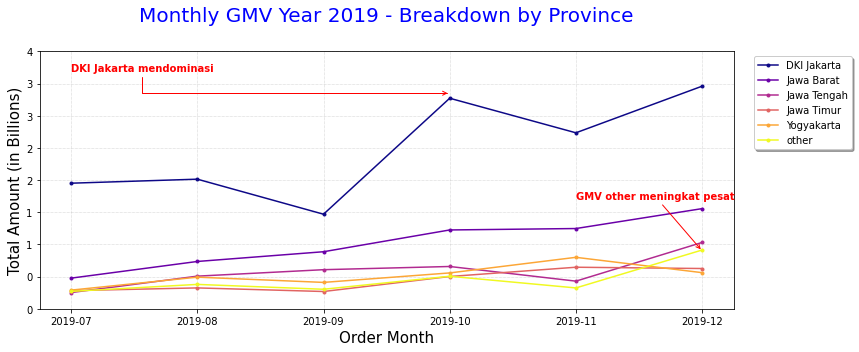

In [7]:
import matplotlib.pyplot as plt
dataset.groupby(["order_month","province_top"])["gmv"].sum().unstack().plot(marker=".", cmap="plasma")
plt.title("Monthly GMV Year 2019 - Breakdown by Province", loc="center", pad=30, fontsize=20, color="blue")
plt.xlabel("Order Month", fontsize=15)
plt.ylabel("Total Amount (in Billions)", fontsize=15)
plt.grid(color="darkgray", linestyle=":", linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc="upper center", bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)

# Anotasi pertama
plt.annotate("GMV other meningkat pesat"
             ,xy=(5, 900000000)
             ,xytext=(4, 1700000000)
             ,weight="bold"
             ,color="red"
             ,arrowprops=dict(arrowstyle="->"
                              ,connectionstyle="arc3"
                              ,color="red")
            )

# Anotasi kedua
plt.annotate("DKI Jakarta mendominasi"
             ,xy=(3, 3350000000)
             ,xytext=(0, 3700000000)
             ,weight="bold"
             ,color="red"
             ,arrowprops=dict(arrowstyle="->"
                              ,connectionstyle="angle"
                              ,color="red")
            )

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()



# Membuat Subset Data

In [8]:
dataset_dki_q4 = dataset[(dataset["province"]=="DKI Jakarta") & (dataset["order_month"] >= "2019-10")]
dataset_dki_q4

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv,province_top
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000,DKI Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1736803,2019-12-22,14577,Jakarta Selatan,DKI Jakarta,P0753,BRAND_C,2,1500000,2019-12,3000000,DKI Jakarta
4992,1734787,2019-12-18,18283,Jakarta Selatan,DKI Jakarta,P0734,BRAND_C,2,310000,2019-12,620000,DKI Jakarta
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2019-10,2988000,DKI Jakarta
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,2019-10,5560000,DKI Jakarta


# Membuat Pie Chart

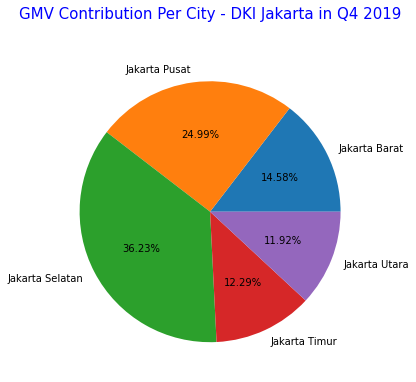

In [9]:
import matplotlib.pyplot as plt
gmv_per_city_dki_q4 = dataset_dki_q4.groupby("city")["gmv"].sum().reset_index()

plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4["gmv"], labels=gmv_per_city_dki_q4["city"], autopct="%1.2f%%")
plt.title("GMV Contribution Per City - DKI Jakarta in Q4 2019", loc="center", pad=30, fontsize=15, color="blue")
plt.show()

# Membuat Bar Chart

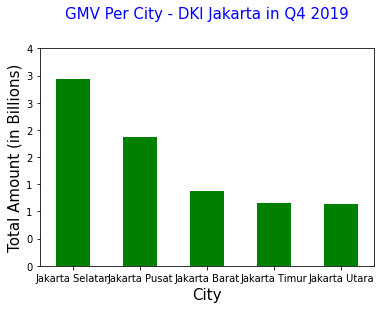

In [10]:
import matplotlib.pyplot as plt
plt.clf()
dataset_dki_q4.groupby("city")["gmv"].sum().sort_values(ascending=False).plot(kind="bar", color="green")
plt.title("GMV Per City - DKI Jakarta in Q4 2019", loc="center", pad=30, fontsize=15, color="blue")
plt.xlabel("City", fontsize=15)
plt.ylabel("Total Amount (in Billions)", fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

# Membuat Multi-Bar Chart

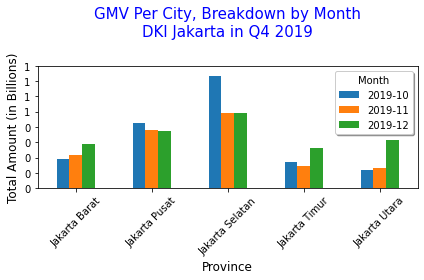

In [11]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(["city","order_month"])["gmv"].sum().unstack().plot(kind="bar")
plt.title("GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019", loc="center", pad=30, fontsize=15, color="blue")
plt.xlabel("Province", fontsize=12)
plt.ylabel("Total Amount (in Billions)", fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, title="Month")
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat Stacked Chart

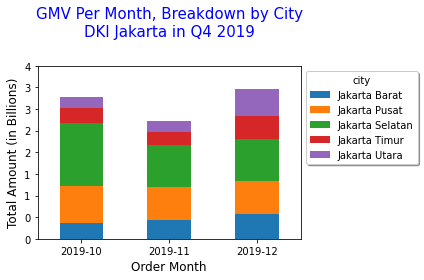

In [12]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(["order_month","city"])["gmv"].sum().sort_values(ascending=False).unstack().plot(kind="bar", stacked=True)
plt.title("GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019", loc="center", pad=30, fontsize=15, color="blue")
plt.xlabel("Order Month", fontsize=12)
plt.ylabel("Total Amount (in Billions)", fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1, title="city")
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Membuat Agregat Data Customer

In [13]:
dataset_dki_q4.head(10)

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv,province_top
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000,DKI Jakarta
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000,2019-12,14400000,DKI Jakarta
13,1705093,2019-10-21,16999,Jakarta Utara,DKI Jakarta,P2521,BRAND_P,4,1745000,2019-10,6980000,DKI Jakarta
14,1734790,2019-12-18,17422,Jakarta Selatan,DKI Jakarta,P0122,BRAND_A,12,695000,2019-12,8340000,DKI Jakarta
28,1718260,2019-11-19,15856,Jakarta Utara,DKI Jakarta,P0456,BRAND_B,10,149000,2019-11,1490000,DKI Jakarta
29,1719550,2019-11-22,15028,Jakarta Selatan,DKI Jakarta,P3194,BRAND_S,18,1150000,2019-11,20700000,DKI Jakarta


In [14]:
data_per_customer = (dataset_dki_q4.groupby("customer_id")
                                   .agg({"order_id":"nunique"
                                         ,"quantity":"sum"
                                         ,"gmv":"sum"})
                                    .reset_index()
                                    .rename(columns={"order_id":"orders"}))
data_per_customer.head(10).sort_values(by="orders", ascending=False)

,customer_id,orders,quantity,gmv
0,12748,29,557,175286000
1,12839,4,91,45925000
2,12841,2,8,5385000
5,12877,2,7,4235000
9,12910,2,50,29500000
3,12849,1,2,3490000
4,12867,1,32,16207000
6,12883,1,9,12429000
7,12890,1,12,4770000
8,12904,1,3,7947000


# Membuat Histogram - Part 1

<Figure size 432x288 with 0 Axes>

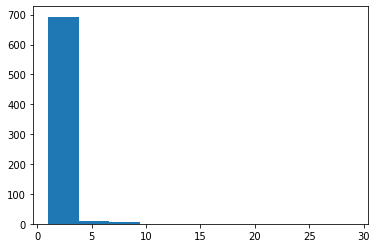

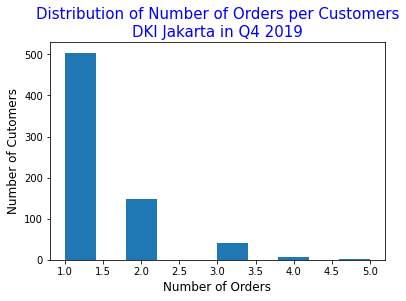

In [15]:
import matplotlib.pyplot as plt
plt.clf()

# Histogram pertama
plt.figure()
plt.hist(data_per_customer["orders"])
plt.show()

# Histogram kedua
plt.figure()
plt.hist(data_per_customer["orders"], range=(1, 5))
plt.title("Distribution of Number of Orders per Customers\nDKI Jakarta in Q4 2019", fontsize=15, color="blue")
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Number of Cutomers", fontsize=12)
plt.show()

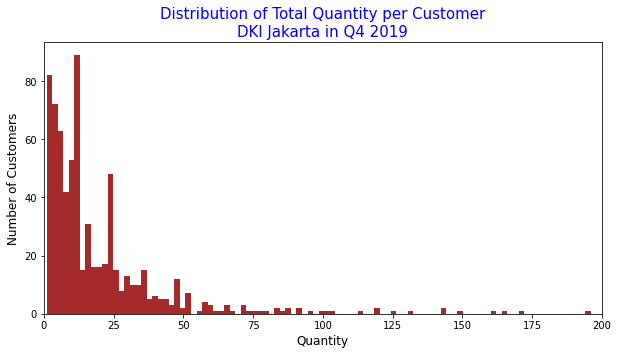

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(data_per_customer["quantity"], bins=100, range=(1, 200), color="brown")
plt.title("Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019", fontsize=15, color="blue")
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xlim(xmin=0, xmax=200)
plt.show()

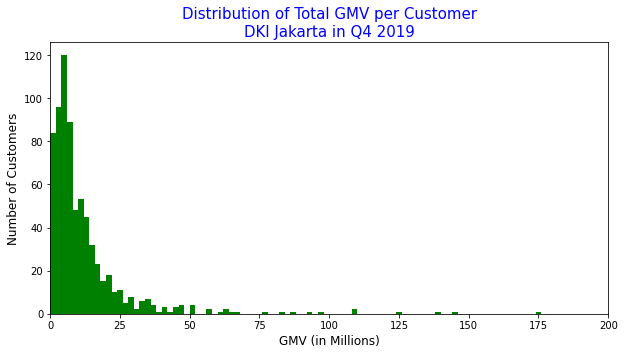

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(data_per_customer["gmv"], bins=100, range=(1, 200000000), color="green")
plt.title("Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019", fontsize=15, color="blue")
plt.xlabel("GMV (in Millions)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xlim(xmin=0, xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()


# Membuat Scatterplot

<Figure size 432x288 with 0 Axes>

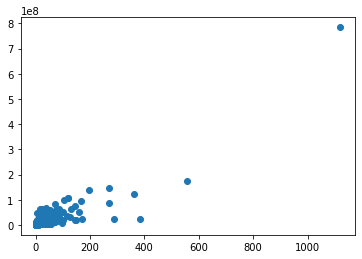

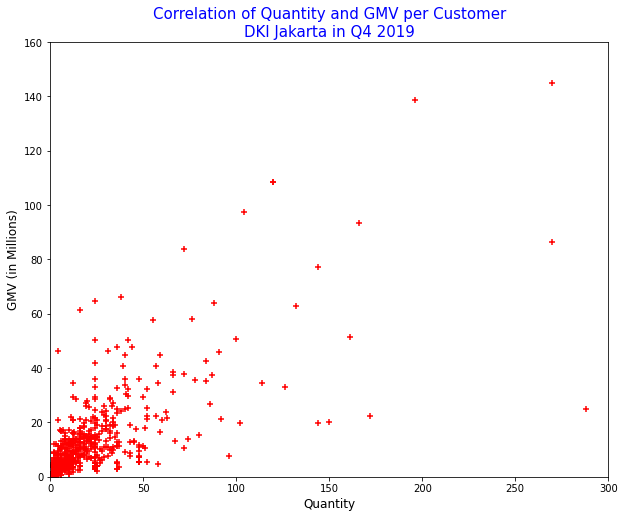

In [18]:
import matplotlib.pyplot as plt
plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer["quantity"], data_per_customer["gmv"])
plt.show()
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10, 8))
plt.scatter(data_per_customer["quantity"], data_per_customer["gmv"], marker="+", color="red")
plt.title("Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019", fontsize=15, color="blue")
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("GMV (in Millions)", fontsize=12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

# Menentukan brand top 5

In [19]:
# Mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset["order_month"]=="2019-12"].groupby("brand")["quantity"]
                                                                          .sum()
                                                                          .reset_index()
                                                                          .sort_values(by="quantity", ascending=False)
                                                                          .head(5))
print(top_brands.head(5))

# Membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = (dataset[(dataset["order_month"]=="2019-12") & (dataset["brand"].isin(top_brands["brand"].to_list()))])
dataset_top5brand_dec.head(10)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv,province_top
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000,2019-12,14400000,DKI Jakarta
14,1734790,2019-12-18,17422,Jakarta Selatan,DKI Jakarta,P0122,BRAND_A,12,695000,2019-12,8340000,DKI Jakarta
19,1731961,2019-12-13,13880,Bogor,Jawa Barat,P2853,BRAND_R,6,740000,2019-12,4440000,Jawa Barat
35,1741561,2019-12-29,13521,Bandung,Jawa Barat,P3344,BRAND_S,2,520000,2019-12,1040000,Jawa Barat
38,1735633,2019-12-19,17096,Jakarta Selatan,DKI Jakarta,P3285,BRAND_S,4,1325000,2019-12,5300000,DKI Jakarta
46,1725274,2019-12-03,17160,Jakarta Utara,DKI Jakarta,P3045,BRAND_R,12,450000,2019-12,5400000,DKI Jakarta
48,1729846,2019-12-10,17231,Bekasi,Jawa Barat,P3537,BRAND_S,2,1745000,2019-12,3490000,Jawa Barat
50,1729615,2019-12-10,14725,Jakarta Utara,DKI Jakarta,P0737,BRAND_C,10,310000,2019-12,3100000,DKI Jakarta
51,1726822,2019-12-05,14096,Surakarta,Jawa Tengah,P0790,BRAND_C,1,1164000,2019-12,1164000,Jawa Tengah
52,1741513,2019-12-29,17936,Bekasi,Jawa Barat,P0794,BRAND_C,12,159000,2019-12,1908000,Jawa Barat


# Case 2: Multi-line chart daily quantity untuk brand top 5

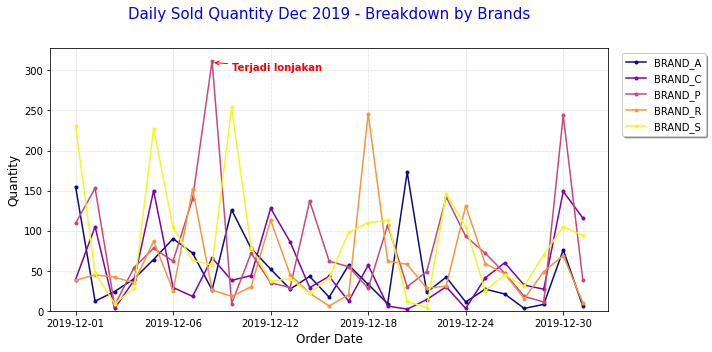

In [20]:
import matplotlib.pyplot as plt
dataset_top5brand_dec.groupby(["order_date","brand"])["quantity"].sum().unstack().plot(marker=".", cmap="plasma")
plt.title("Daily Sold Quantity Dec 2019 - Breakdown by Brands", loc="center", pad=30, fontsize=15, color="blue")
plt.xlabel("Order Date", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.grid(color="darkgray", linestyle=":", linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc="upper center", bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate("Terjadi lonjakan"
             ,xy=(7, 310)
             ,xytext=(8, 300)
             ,weight="bold"
             ,color="red"
             ,arrowprops=dict(arrowstyle="->"
                              ,connectionstyle="arc3"
                              ,color="red")
            )
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

# Kuantitas penjualan brand top 5 selama Desember 2019

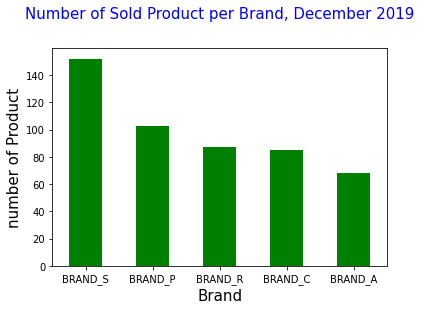

In [21]:
import matplotlib.pyplot as plt
plt.clf()
dataset_top5brand_dec.groupby("brand")["product_id"].nunique().sort_values(ascending=False).plot(kind="bar", color="green")
plt.title("Number of Sold Product per Brand, December 2019", loc="center", pad=30, fontsize=15, color="blue")
plt.xlabel("Brand", fontsize=15)
plt.ylabel("number of Product", fontsize=15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

# Penjualan Produk diatas 100 dan dibawah 100 selama Desember 2019

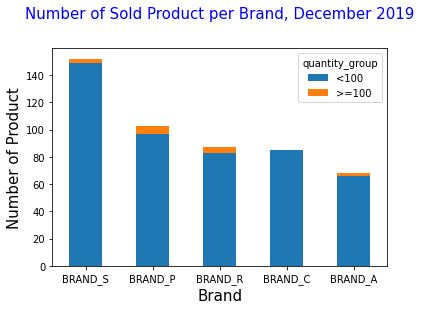

In [22]:
import matplotlib.pyplot as plt

# Membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(["brand","product_id"])["quantity"].sum().reset_index()

# Beri kolom baru untuk menandai product yang terjual >= 100 dan < 100
dataset_top5brand_dec_per_product["quantity_group"] = dataset_top5brand_dec_per_product["quantity"].apply(lambda x: ">=100" if x >=100 else "<100")
dataset_top5brand_dec_per_product.sort_values("quantity", ascending=False, inplace=True)

# Membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby("brand")["product_id"].nunique().sort_values(ascending=False)

# Plot stacked barchart
dataset_top5brand_dec_per_product.groupby(["brand","quantity_group"])["product_id"].nunique().reindex(index=s_sort.index, level="brand").unstack().plot(kind="bar", stacked=True)
plt.title("Number of Sold Product per Brand, December 2019", loc="center", pad=30, fontsize=15, color="blue")
plt.xlabel("Brand", fontsize=15)
plt.ylabel("Number of Product", fontsize=15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

# Murah atau mahalkan harga produk brand top 5

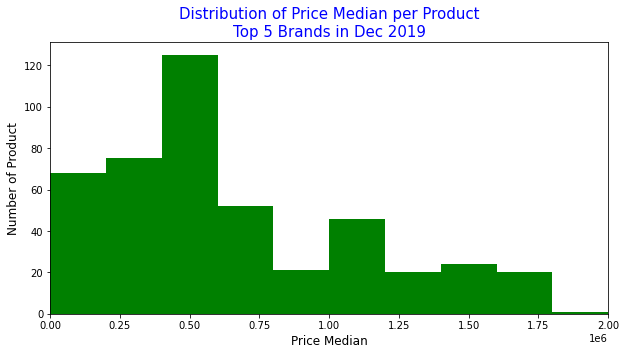

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(dataset_top5brand_dec.groupby("product_id")["item_price"].median(), bins=10, stacked=True, range=(1, 2000000), color="green")
plt.title("Distribution of Price Median per Product\nTop 5 Brands in Dec 2019", fontsize=15, color="blue")
plt.xlabel("Price Median", fontsize=12)
plt.ylabel("Number of Product", fontsize=12)
plt.xlim(xmin=0, xmax=2000000)
plt.show()

# Korelasi quantity vs GMV

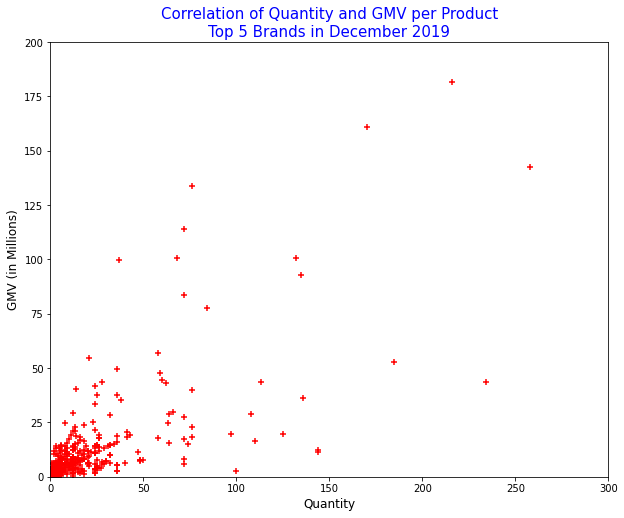

In [30]:
import matplotlib.pyplot as plt

# Aggregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby("product_id").agg({"quantity":"sum"
                                                                                  ,"gmv":"sum"
                                                                                  ,"item_price":"median"}).reset_index()
# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data_per_product_top5brand_dec["quantity"], data_per_product_top5brand_dec["gmv"], marker="+", color="red")
plt.title("Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019", fontsize=15, color="blue")
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("GMV (in Millions)", fontsize=12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

# Korelasi Median Harga VS Quantity

<Figure size 432x288 with 0 Axes>

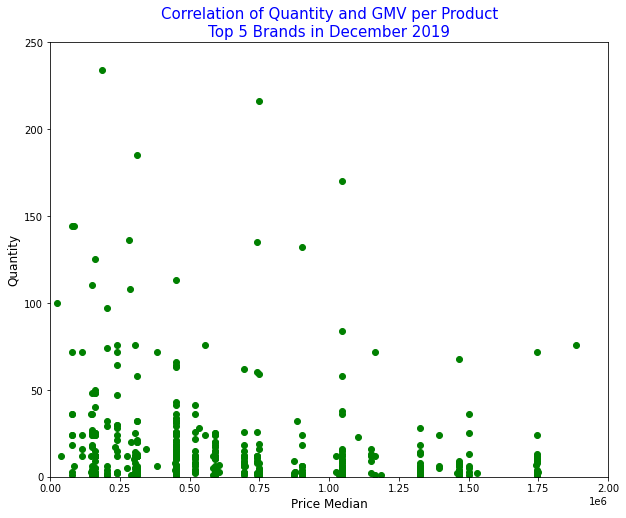

In [33]:
import matplotlib.pyplot as plt
plt.clf()

# Aggregat per Product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby("product_id").agg({"quantity":"sum"
                                                                                 ,"gmv":"sum"
                                                                                 ,"item_price":"median"}).reset_index()

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data_per_product_top5brand_dec["item_price"], data_per_product_top5brand_dec["quantity"], marker="o", color="green")
plt.title("Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019", fontsize=15, color="blue")
plt.xlabel("Price Median", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.xlim(xmin=0, xmax=2000000)
plt.ylim(ymin=0, ymax=250)
plt.show()